**Reading data from yahoo website directly**

In [101]:
!pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
tick1='AMZN'
tick2='AAPL'
tick3='GOOG'
tick4='MSFT'
AMZN=yf.download(tick1,start='2017-08-25',end='2022-08-25')
AAPL=yf.download(tick2,start='2017-08-25',end='2022-08-25')
GOOG=yf.download(tick3,start='2017-08-25',end='2022-08-25')
MSFT=yf.download(tick4,start='2017-08-25',end='2022-08-25')

AMZN.head()
AAPL.head()
GOOG.head()
MSFT.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-25,72.860001,73.349998,72.480003,72.820000,68.233002,12794300
2017-08-28,73.059998,73.089996,72.550003,72.830002,68.242371,14569700
2017-08-29,72.250000,73.160004,72.050003,73.050003,68.448524,11478400
2017-08-30,73.010002,74.209999,72.830002,74.010002,69.348045,16897800
2017-08-31,74.029999,74.959999,73.800003,74.769997,70.060150,27652800


**Perform Cleaning**

In [103]:
# data has no null values
AMZN.isnull().sum()
AAPL.isnull().sum()
GOOG.isnull().sum()
MSFT.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [104]:
#data has no duplicates
AMZN.duplicated().sum()
AAPL.duplicated().sum()
GOOG.duplicated().sum()
MSFT.duplicated().sum()

0

In [105]:
#checking for outliers
AMZN.describe()
AAPL.describe()
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,82.501429,83.399156,81.655288,82.546416,82.546416,3.102944e+07
std,32.337364,32.660640,31.976412,32.306703,32.306703,1.358593e+07
min,45.255001,45.962250,45.250000,45.690498,45.690498,6.936000e+06
25%,56.287625,56.910377,55.672001,56.240751,56.240751,2.253800e+07
50%,67.500000,68.011497,66.987499,67.454250,67.454250,2.783600e+07
75%,113.083878,114.749498,112.082813,113.244253,113.244253,3.531300e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.241400e+08


<AxesSubplot:>

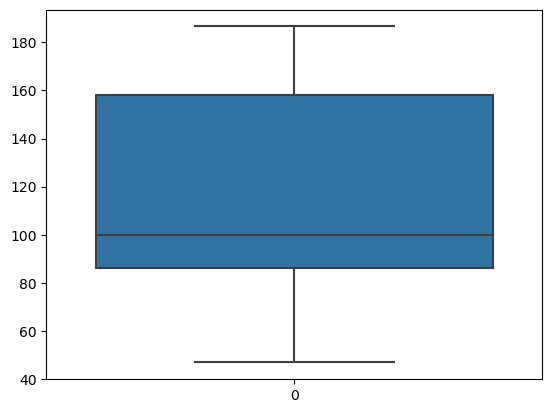

In [106]:
sns.boxplot(data=AMZN['Adj Close']) # no outliers

<AxesSubplot:>

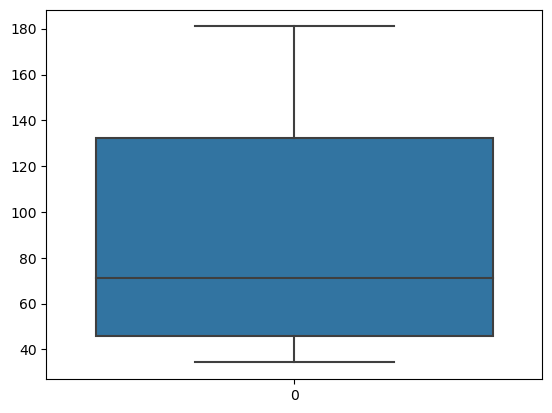

In [107]:
sns.boxplot(data=AAPL['Adj Close']) # no outliers

<AxesSubplot:>

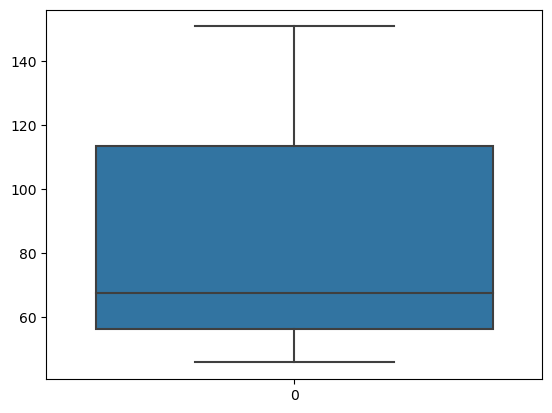

In [108]:
sns.boxplot(data=GOOG['Adj Close']) # no outliers

<AxesSubplot:>

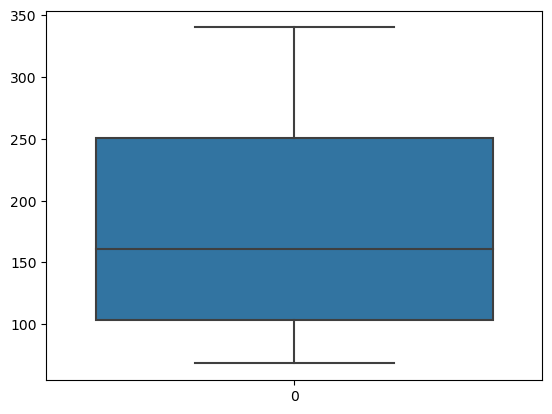

In [109]:
sns.boxplot(data=MSFT['Adj Close']) # no outliers

**Change in stock price over time**

Text(0.5, 1.0, 'Change in stock price over time')

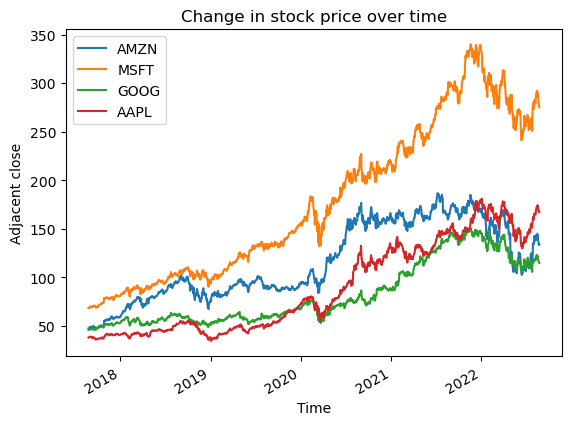

In [110]:
AMZN['Adj Close'].plot()
MSFT['Adj Close'].plot()
GOOG['Adj Close'].plot()
AAPL['Adj Close'].plot()
plt.legend(['AMZN','MSFT','GOOG','AAPL'])
plt.xlabel('Time')
plt.ylabel('Adjacent close')
plt.title('Change in stock price over time')

**Visualize stock's volume to be traded**

Text(0.5, 1.0, 'Change in volume of stock traded over time over time')

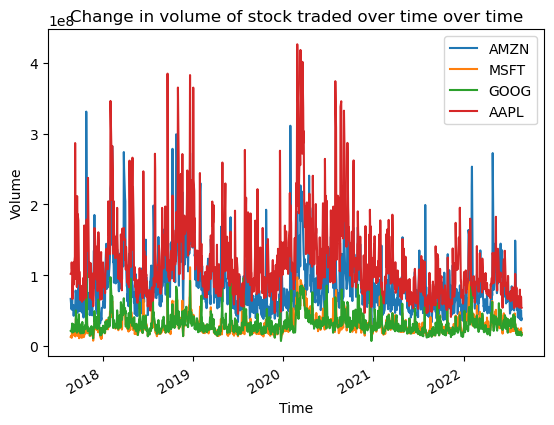

In [111]:
AMZN['Volume'].plot()
MSFT['Volume'].plot()
GOOG['Volume'].plot()
AAPL['Volume'].plot()
plt.legend(['AMZN','MSFT','GOOG','AAPL'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Change in volume of stock traded over time over time')

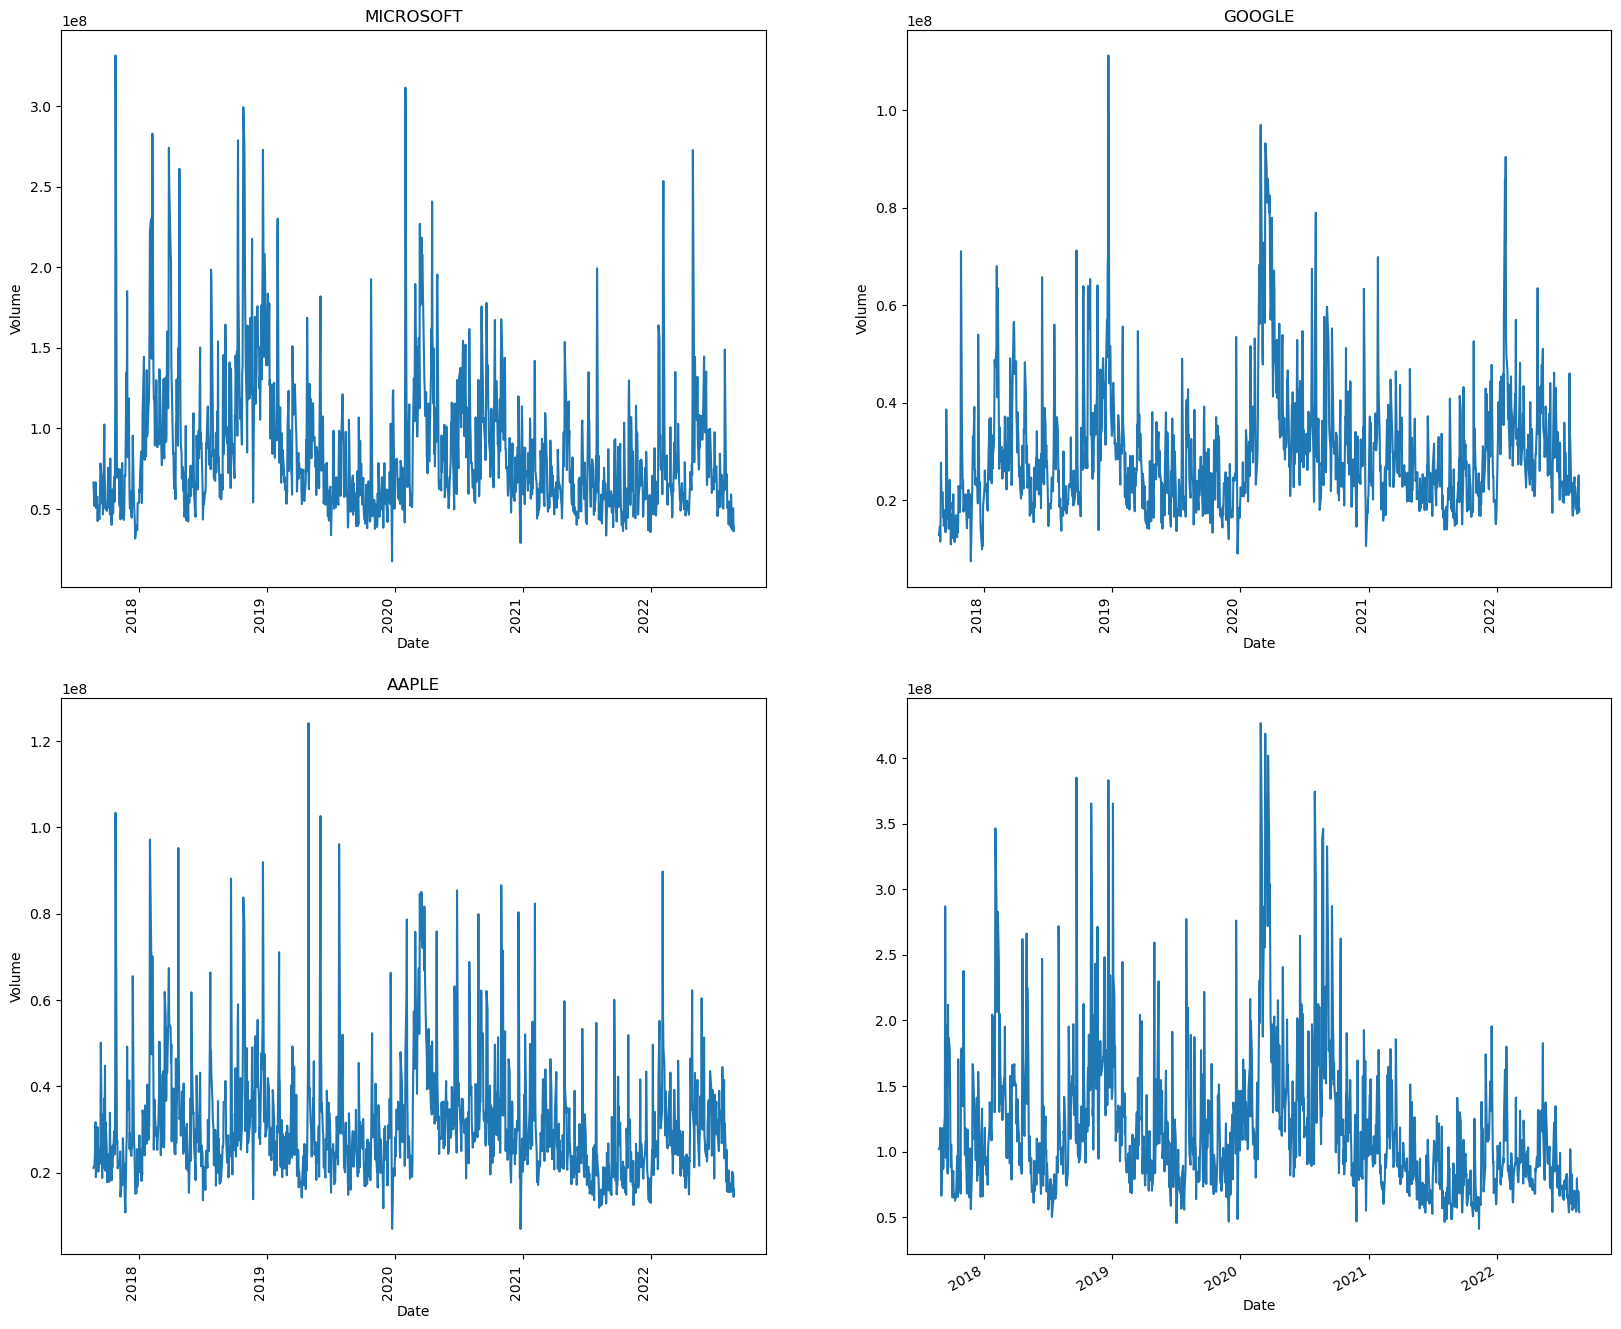

In [112]:
cols=[AMZN,MSFT,GOOG,AAPL]
cols1=['AMAZON','MICROSOFT','GOOGLE','AAPLE']
i=1
j=0

plt.figure(figsize=(20,18))
for x in cols:
    plt.xticks(rotation=90)
    plt.title(cols1[j])
    plt.ylabel('Volume')
    plt.subplot(2,2,i)
    x['Volume'].plot()
    i=i+1
    j=j+1
plt.show()

**Moving average of various stocks**

In [145]:
print('MOVING AVERAGE OF AMAZON FOR 30 DAYS')
AMZN['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF AMAZON FOR 30 DAYS


Date
2017-08-25           NaN
2017-08-28           NaN
2017-08-29           NaN
2017-08-30           NaN
2017-08-31           NaN
                 ...    
2022-08-18    128.531667
2022-08-19    129.288000
2022-08-22    130.003667
2022-08-23    130.817000
2022-08-24    131.597000
Name: Adj Close, Length: 1258, dtype: float64

In [146]:
print('MOVING AVERAGE OF MICROSOFT FOR 30 DAYS')
MSFT['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF MICROSOFT FOR 30 DAYS


Date
2017-08-25           NaN
2017-08-28           NaN
2017-08-29           NaN
2017-08-30           NaN
2017-08-31           NaN
                 ...    
2022-08-18    271.613206
2022-08-19    272.246652
2022-08-22    272.705368
2022-08-23    273.480095
2022-08-24    274.264728
Name: Adj Close, Length: 1258, dtype: float64

In [147]:
print('MOVING AVERAGE OF GOOGLE FOR 30 DAYS')
GOOG['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF GOOGLE FOR 30 DAYS


Date
2017-08-25           NaN
2017-08-28           NaN
2017-08-29           NaN
2017-08-30           NaN
2017-08-31           NaN
                 ...    
2022-08-18    116.054150
2022-08-19    115.985867
2022-08-22    115.937450
2022-08-23    115.934800
2022-08-24    116.018567
Name: Adj Close, Length: 1258, dtype: float64

In [148]:
print('MOVING AVERAGE OF APPLE FOR 30 DAYS')
AAPL['Adj Close'].rolling(window=30).mean()

MOVING AVERAGE OF APPLE FOR 30 DAYS


Date
2017-08-25           NaN
2017-08-28           NaN
2017-08-29           NaN
2017-08-30           NaN
2017-08-31           NaN
                 ...    
2022-08-18    158.827583
2022-08-19    159.649020
2022-08-22    160.411122
2022-08-23    161.129008
2022-08-24    161.869174
Name: Adj Close, Length: 1258, dtype: float64

**Daily return average of various stocks**

In [150]:
print('DAILY RETURN AVERAGE OF APPLE')
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
print(AAPL['Daily Return'])

DAILY RETURN AVERAGE OF APPLE
Date
2017-08-25         NaN
2017-08-28    0.010071
2017-08-29    0.008918
2017-08-30    0.002701
2017-08-31    0.003979
                ...   
2022-08-18   -0.002292
2022-08-19   -0.015102
2022-08-22   -0.023029
2022-08-23   -0.002029
2022-08-24    0.001794
Name: Daily Return, Length: 1258, dtype: float64


In [151]:
print('DAILY RETURN AVERAGE OF GOOGLE')
GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
print(GOOG['Daily Return'])

DAILY RETURN AVERAGE OF GOOGLE
Date
2017-08-25         NaN
2017-08-28   -0.002271
2017-08-29    0.008186
2017-08-30    0.008987
2017-08-31    0.010499
                ...   
2022-08-18    0.004488
2022-08-19   -0.022671
2022-08-22   -0.025821
2022-08-23   -0.002607
2022-08-24   -0.000610
Name: Daily Return, Length: 1258, dtype: float64


In [152]:
print('DAILY RETURN AVERAGE OF MICROSOFT')
MSFT['Daily Return']=MSFT['Adj Close'].pct_change()
print(MSFT['Daily Return'])

DAILY RETURN AVERAGE OF MICROSOFT
Date
2017-08-25         NaN
2017-08-28    0.000137
2017-08-29    0.003021
2017-08-30    0.013142
2017-08-31    0.010269
                ...   
2022-08-18   -0.003948
2022-08-19   -0.013854
2022-08-22   -0.029355
2022-08-23   -0.004716
2022-08-24   -0.002351
Name: Daily Return, Length: 1258, dtype: float64


In [153]:
print('DAILY RETURN AVERAGE OF AMAZON')
AMZN['Daily Return']=AMZN['Adj Close'].pct_change()
print(AMZN['Daily Return'])

DAILY RETURN AVERAGE OF AMAZON
Date
2017-08-25         NaN
2017-08-28    0.000804
2017-08-29    0.008499
2017-08-30    0.014182
2017-08-31    0.013446
                ...   
2022-08-18    0.001407
2022-08-19   -0.028602
2022-08-22   -0.036244
2022-08-23    0.003003
2022-08-24    0.001347
Name: Daily Return, Length: 1258, dtype: float64


**Creating trend column and adding it to the dataframe**

In [121]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))

AAPL['Trend']= np.zeros(AAPL['Daily Return'].count()+1)
AAPL['Trend']= AAPL['Daily Return'].apply(lambda x:trend(x))

MSFT['Trend']= np.zeros(MSFT['Daily Return'].count()+1)
MSFT['Trend']= MSFT['Daily Return'].apply(lambda x:trend(x))

GOOG['Trend']= np.zeros(GOOG['Daily Return'].count()+1)
GOOG['Trend']= GOOG['Daily Return'].apply(lambda x:trend(x))

In [154]:
AMZN.head() # trend column added

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
Date,,,,,,,,
2017-08-25,47.799999,47.881001,47.205002,47.263000,47.263000,66496000,NaN,None
2017-08-28,47.327000,47.650002,47.112499,47.300999,47.300999,51934000,0.000804,Slight or No change
2017-08-29,47.000000,47.799999,46.816502,47.702999,47.702999,57486000,0.008499,Slight or No change
2017-08-30,47.922001,48.470501,47.845501,48.379501,48.379501,58092000,0.014182,Slight or No change
2017-08-31,48.735001,49.049999,48.638000,49.029999,49.029999,66630000,0.013446,Slight or No change


**Visualize trend frequency in pie chart**

Text(0.5, 1.0, 'AMAZON TREND VALUES')

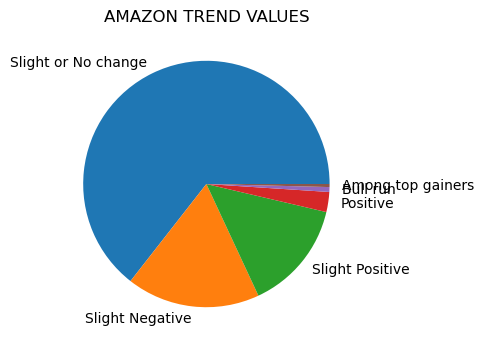

In [155]:
label=AMZN.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(AMZN['Trend'].value_counts().values,labels=label)
plt.title('AMAZON TREND VALUES')

Text(0.5, 1.0, 'APPLE TREND VALUES')

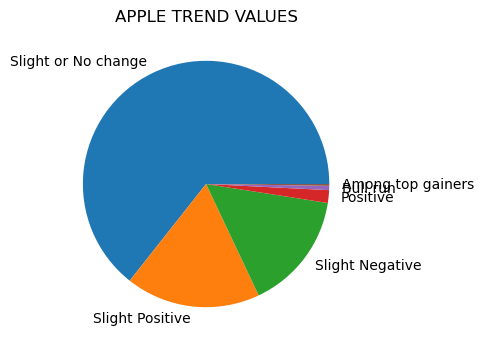

In [156]:
label=AAPL.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(AAPL['Trend'].value_counts().values,labels=label)
plt.title('APPLE TREND VALUES')

Text(0.5, 1.0, 'MICROSOFT TREND VALUES')

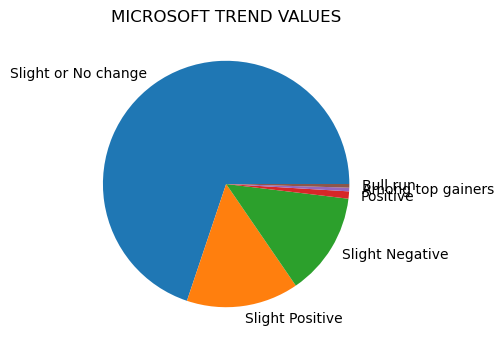

In [157]:
label=MSFT.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(MSFT['Trend'].value_counts().values,labels=label)
plt.title('MICROSOFT TREND VALUES')

Text(0.5, 1.0, 'GOOGLE TREND VALUES')

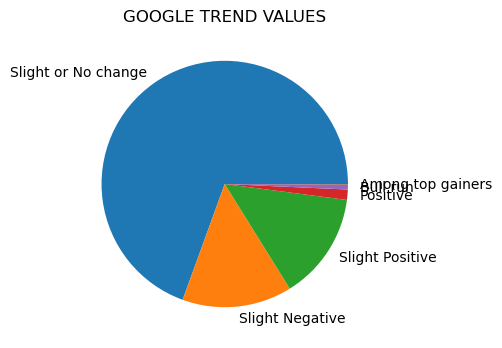

In [158]:
label=GOOG.Trend.value_counts().index
plt.figure(figsize=(4,4))
plt.pie(GOOG['Trend'].value_counts().values,labels=label)
plt.title('GOOGLE TREND VALUES')

**Finding correlation of daily returns**

In [136]:
# creating dataframe with daily return of every company
df1=pd.concat([AAPL['Daily Return'],AMZN['Daily Return'],GOOG['Daily Return'],MSFT['Daily Return']],axis=1)

In [139]:
# changing name of each column
df1.columns=['Apple','Amazon','Google','Microsoft']

In [140]:
df1.head()

,Apple,Amazon,Google,Microsoft
Date,,,,
2017-08-25,NaN,NaN,NaN,NaN
2017-08-28,0.010071,0.000804,-0.002271,0.000137
2017-08-29,0.008918,0.008499,0.008186,0.003021
2017-08-30,0.002701,0.014182,0.008987,0.013142
2017-08-31,0.003979,0.013446,0.010499,0.010269


<AxesSubplot:>

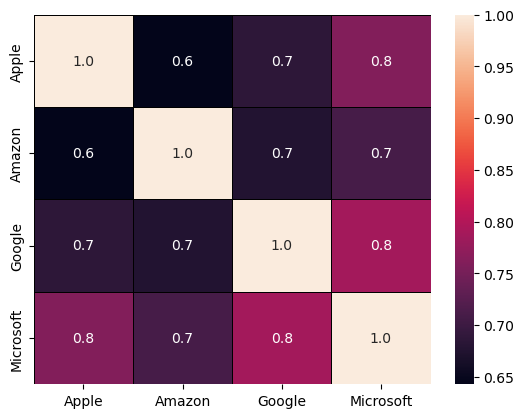

In [144]:
sns.heatmap(df1.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f") 